### Найдем окружность по точкам методом МНК :


Вход : $\{( X_i , Y_i)\}_{1}^n$\
Где в качестве $X_i$ : точка в $R^2$ $(х_i,у_i)$ \
А в качестве $Y_i$ : Норма точки $(х_i,у_i) = x^2+y^2$  \
Признаки : $2x_i , 2y_i , 1$ \
Матрица признаков : $X = [2x_{array}^T,2y_{array}^T,1_{array}^T]$ \
Искомый вектор : $w$ \
Функционал : $Q((x,y)) = \||Xw - y\||^2$ =$<Xw-y,Xw-y>$ \
Минимизируем его : $d(<Xw-y,Xw-y>) = 0$ , верно при $X^TXw=X^Ty$ $\rightarrow$ $w = (X^TX)^{-1}X^Ty$ \
Функционал достигает минимума при искомой  : $w = (X^TX)^{-1}X^Ty$ 

Функционал означает : сумма квадратов расстояний от точки до найденной окружности

Уравнение окружности : $(x-a)^2+(y-b)^2 = R^2$ \
Найдя $w$ получаем искомые a,b,R : \
    1) $a = w[0]$ \
    2) $b = w[1]$ \
    3) $R = \sqrt{w[2]+w[0]^2+w[1]^2}$

In [6]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rc('font', **{'size' : 22})

In [3]:
def MNK_cicrcle(x,y):
    b = []
    for i in range(len(x)) :
        b.append(x[i]**2+y[i]**2)
    b = np.array(b)
    X = []
    X.append(2*x)
    X.append(2*y)
    X.append(np.ones(len(x)).astype(np.float32))
    X = np.array(X)
    XT = X
    X = np.transpose(X)
    res = np.linalg.inv(XT@X)@XT@b
    
    return (res[0],res[1],np.sqrt(res[2]+res[0]**2+res[1]**2), (X@res-b)@(X@res-b))

a =  -3.9999999999999982
b =  -4.000000000000001
R =  2.915475947422651
Минимальное значение функционала ошибки Q =  2.0000000000000284


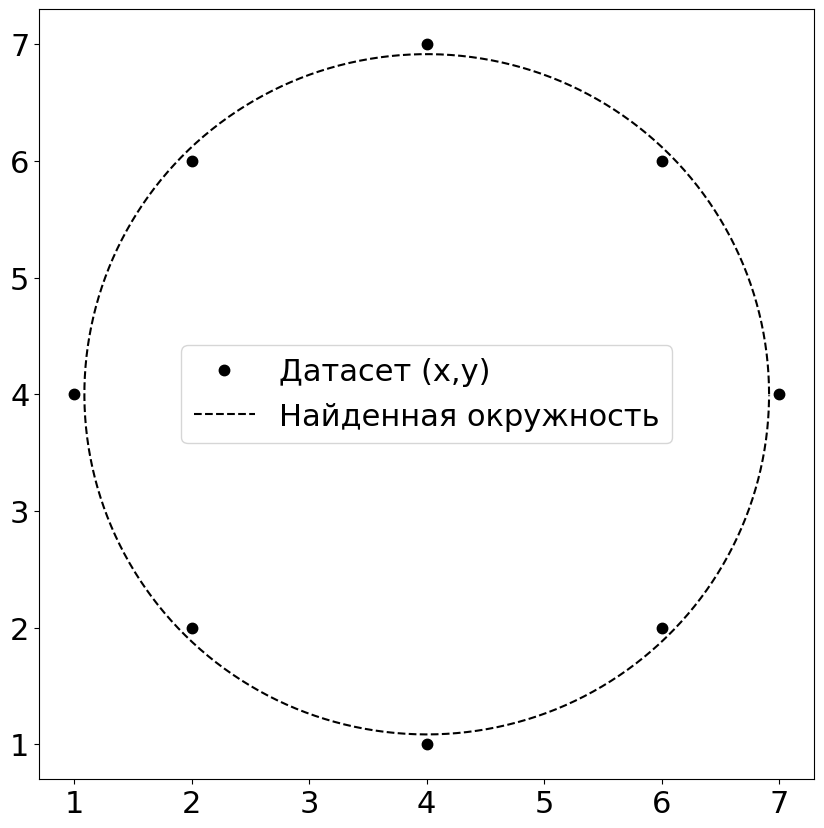

In [4]:

x_array = np.array([1.0 ,2.0,2.0,4.0,4.0 ,6.0,6.0 ,7.0])
y_array = np.array([4.0,2.0,6.0,1.0,7.0,2.0,6.0,4.0])

h_array = np.arange(0.0,2*np.pi , 0.01)
(a,b,R,Q) = MNK_cicrcle(x_array,y_array)
x_circle = R*np.cos(h_array) + a*np.ones(len(h_array)).astype(np.float32)
y_circle = R*np.sin(h_array) + b*np.ones(len(h_array)).astype(np.float32)
print("a = ",-a) 
print("b = ",-b)
print("R = ",R)
print("Минимальное значение функционала ошибки Q = " ,Q)
plt.figure(figsize=(10, 10))
plt.plot(x_array,y_array , 'k.', ms=15, label='Датасет (х,у)')
plt.plot(x_circle,y_circle , 'k--', ms=15, label='Найденная окружность')

plt.legend()
plt.show()

Тестим : генерируем 100 точек окружности с радиусом R = 40  
со смещением центра в (a,b) = (4 , 20) и колебанием радиуса синусоидой R(1 $\pm sin(5*\phi))$

a =  4.000000000000001
b =  19.999999999999993
R =  42.426406871192846
Минимальное значение функционала ошибки Q =  130000000.0


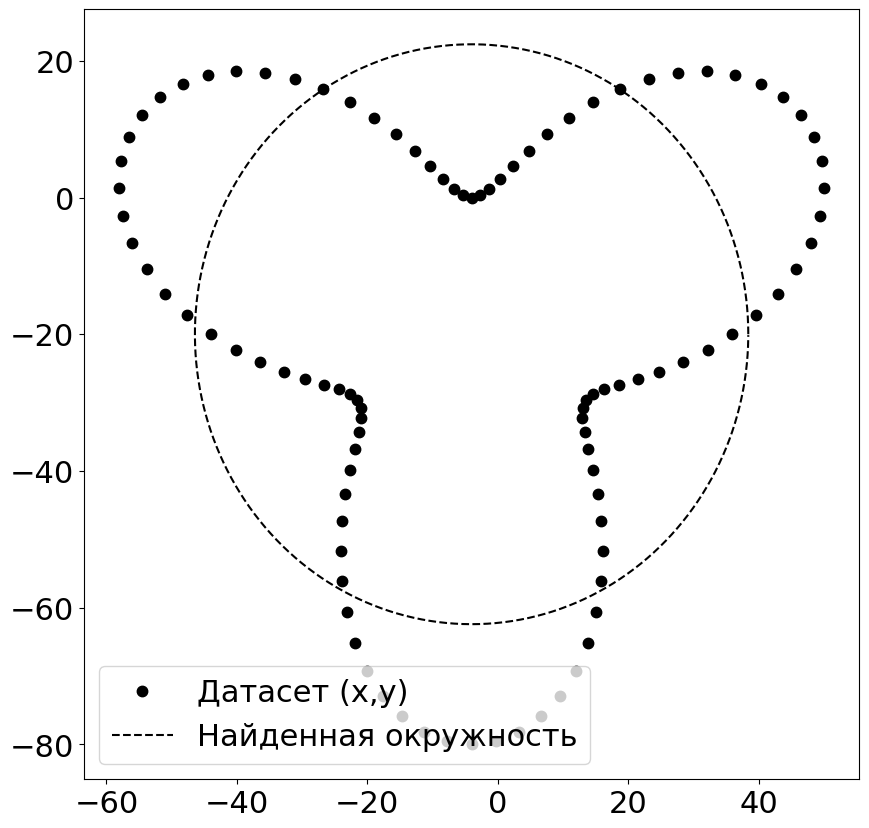

In [5]:

phi_array = np.arange(0.0 , 2*np.pi , 0.02*np.pi)
R = 40.0
a = 4.0
b = 20.0

x_array = (R + 0.5*R*np.sin(3*phi_array) )*np.cos(phi_array) - a*np.ones(len(phi_array))
y_array = (R +0.5*R*np.sin(3*phi_array) )*np.sin(phi_array) - b*np.ones(len(phi_array))


h_array = np.arange(0.0,2*np.pi , 0.01)
(a,b,R,Q) = MNK_cicrcle(x_array,y_array)
x_circle = R*np.cos(h_array) + a*np.ones(len(h_array)).astype(np.float32)
y_circle = R*np.sin(h_array) + b*np.ones(len(h_array)).astype(np.float32)
print("a = ",-a) 
print("b = ",-b)
print("R = ",R)
print("Минимальное значение функционала ошибки Q = " ,Q)
plt.figure(figsize=(10, 10))
plt.plot(x_array,y_array , 'k.', ms=15, label='Датасет (х,у)')
plt.plot(x_circle,y_circle , 'k--', ms=15, label='Найденная окружность')

plt.legend()
plt.show()

### Усовершенствуем алгоритм  :  теперь он будет подгонять эллипс под данные

In [10]:

def MNK_ellipse(x,y):
    b = []
    for i in range(len(x)) :
        b.append(-1)
    b = np.array(b)
    X = []
    X.append(x*x)
    X.append(y*y)
    X.append(x)
    X.append(y)
    # X.append(x*y)
    X = np.array(X)
    XT = X
    X = np.transpose(X)
    res = np.linalg.inv(XT@X)@XT@b
    return (res[0],res[1],res[2],res[3],0.0)


def generate_points(coef , min_x ,max_x , min_y,max_y):
    x_point = np.arange(min_x,max_x ,0.5)
    y_point = np.arange(min_y,max_y ,0.5)
    x_array = []
    y_array = []
    for x in x_point :
        for y in y_point :
            if abs((coef[0]*x**2 + coef[1]*y**2 + coef[2]*x + coef[3]*y + coef[4]*x*y) + 1 ) < 1 :
                x_array.append(x)
                y_array.append(y)
    return (x_array ,y_array)

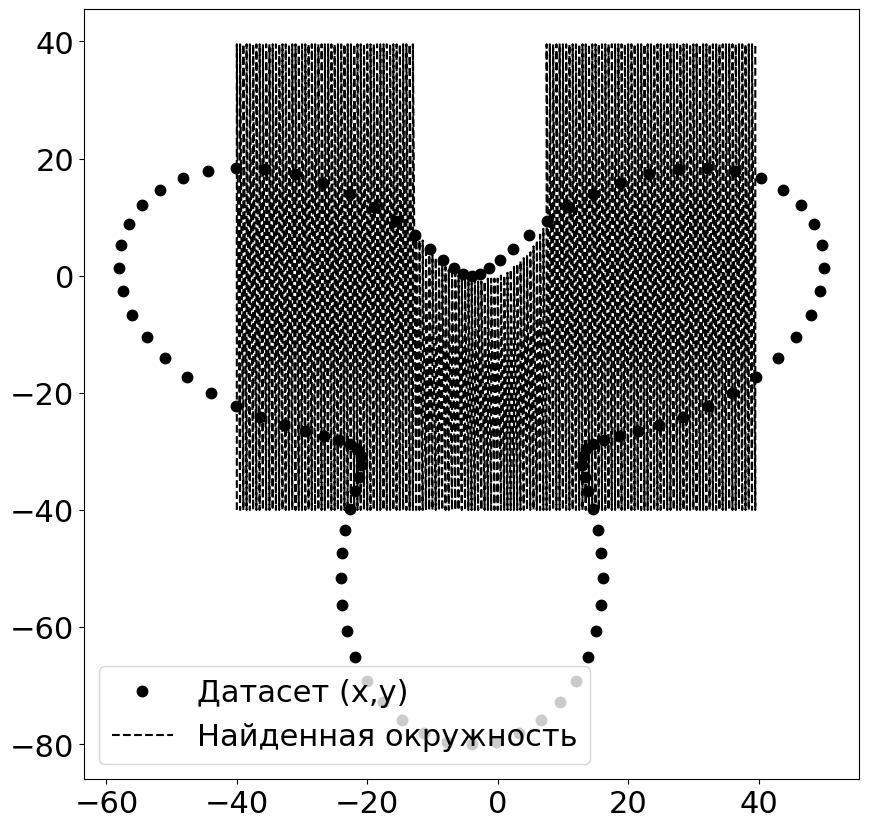

In [11]:

phi_array = np.arange(0.0 , 2*np.pi , 0.02*np.pi)
R = 40.0
a = 4.0
b = 20.0

x_array = (R + 0.5*R*np.sin(3*phi_array) )*np.cos(phi_array) - a*np.ones(len(phi_array))
y_array = (R +0.5*R*np.sin(3*phi_array) )*np.sin(phi_array) - b*np.ones(len(phi_array))

res = MNK_ellipse(x_array,y_array)

(x_points ,y_points) = generate_points(res ,-40.0 ,40.0 ,-40.0 , 40.0)

plt.figure(figsize=(10, 10))
plt.plot(x_array,y_array , 'k.', ms=15, label='Датасет (х,у)')
plt.plot(x_points,y_points , 'k--', ms=15, label='Найденная окружность')

plt.legend()
plt.show()